In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load datasets

Attributes:
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: the predicted attribute: heart disease presence (values 1,2,3,4) and absence (value 0).  

In [2]:
cleveland = pd.read_csv('processed.cleveland.data', 
            names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'])

In [3]:
hungarian = pd.read_csv('processed.hungarian.data', 
            names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'])


In [4]:
switzerland = pd.read_csv('processed.switzerland.data', 
            names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'])


In [5]:
va = pd.read_csv('processed.va.data', 
            names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'])


In [6]:
statlog = pd.read_csv('statlog.dat', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'], delimiter=' ')

In [7]:
# with this dataset 2 (presence) and 1(absence)
statlog.num = statlog.num.map(lambda x: 1 if x==2 else 0)

In [8]:
statlog.num.value_counts()

0    150
1    120
Name: num, dtype: int64

### Preprocess dataset

Combine dataset together

In [9]:
from scipy import stats

In [10]:
data = pd.concat([cleveland, hungarian, switzerland, va, statlog])

Drop na

In [11]:
data = data.replace('?', np.nan).dropna()

In [12]:
data.shape

(569, 14)

In [13]:
data.num.value_counts()

0    310
1    176
2     35
3     35
4     13
Name: num, dtype: int64

Convert num column into "presence" column

In [14]:
data['presence'] = data['num']!=0
data.presence = data.presence.astype('int32')
data = data.drop('num', axis=1)


Reindex the column

In [15]:
data=data.reset_index().drop('index', axis=1)

Convert into correct data type

In [16]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
presence      int32
dtype: object

In [17]:
data.age = data.age.astype("float64").astype("int32")
data.sex =  data.sex.astype("float64").astype("int32")
data.cp = data.cp.astype("float64").astype("int32")
data.trestbps = data.trestbps.astype("float64").astype("int32")
data.chol = data.chol.astype("float64").astype("int32")
data.fbs = data.fbs.astype("float64").astype("int32")
data.restecg = data.restecg.astype("float64").astype("int32")
data.thalach = data.thalach.astype("float64").astype("int32")
data.exang = data.exang.astype("float64").astype("int32")
data.oldpeak = data.oldpeak.astype("float64")
data.slope = data.slope.astype("float64").astype("int32")
data.ca = data.ca.astype("float64").astype("int32")
data.thal = data.thal.astype("float64").astype("int32")


### Trainning set and testing set

In [18]:
inputs = data.copy().drop('presence', axis=1)
inputs.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [19]:
target = data.presence
target.head()

0    0
1    1
2    1
3    0
4    0
Name: presence, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size=0.2, stratify=data.presence, random_state=4)

In [22]:
train_target.value_counts()

0    248
1    207
Name: presence, dtype: int64

In [23]:
test_target.value_counts()

0    62
1    52
Name: presence, dtype: int64

In [24]:
test_inputs.reset_index().drop("index", axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,4,108,233,1,0,147,0,0.1,1,3,7
1,62,0,4,140,394,0,2,157,0,1.2,2,0,3
2,42,1,4,136,315,0,0,125,1,1.8,2,0,6
3,66,1,4,112,212,0,2,132,1,0.1,1,1,3
4,41,1,3,112,250,0,0,179,0,0.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,64,1,4,128,263,0,0,105,1,0.2,2,1,7
110,44,1,3,130,233,0,0,179,1,0.4,1,0,3
111,55,1,4,160,289,0,2,145,1,0.8,2,1,7
112,44,0,3,108,141,0,0,175,0,0.6,2,0,3


### Study data

In [25]:
train_inputs.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,54.329670,0.694505,3.127473,131.485714,248.707692,0.138462,0.991209,149.120879,0.331868,1.065495,1.582418,0.648352,4.742857
std,9.038409,0.461124,0.985139,17.284460,53.417773,0.345764,0.995546,22.869884,0.471402,1.163589,0.616690,0.931268,1.946936
min,29.000000,0.000000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


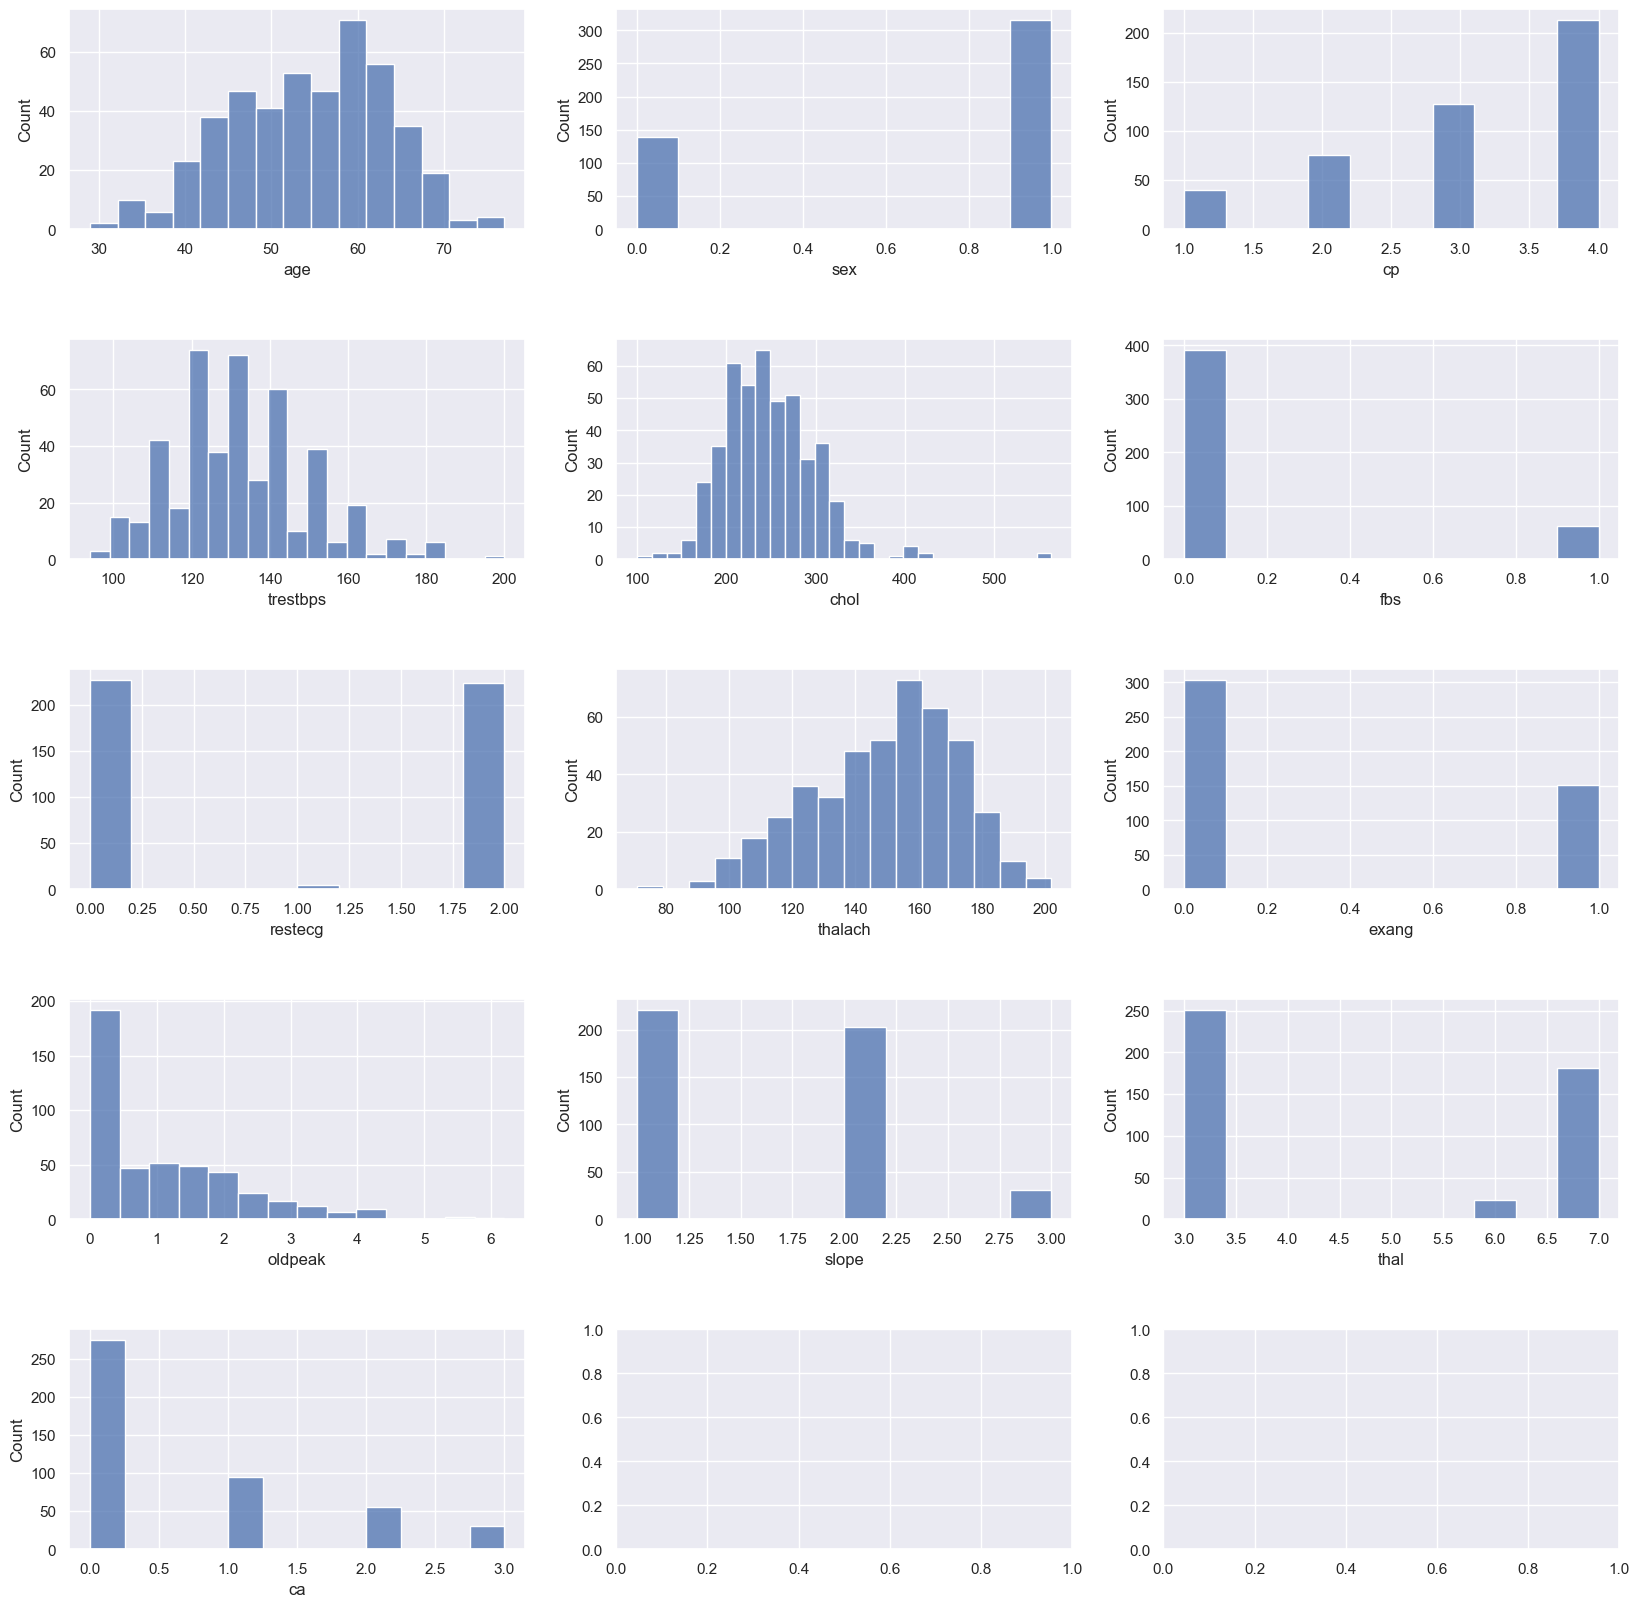

In [26]:
sns.set(rc={'figure.figsize':(20,20)})
fig, ax = plt.subplots(nrows=5, ncols=3, gridspec_kw= {'hspace':0.5})

sns.histplot(train_inputs.age, ax=ax[0,0])
sns.histplot(train_inputs.sex, ax=ax[0,1])
sns.histplot(train_inputs.cp, ax=ax[0,2])
sns.histplot(train_inputs.trestbps, ax=ax[1,0])
sns.histplot(train_inputs.chol, ax=ax[1,1])
sns.histplot(train_inputs.fbs, ax=ax[1,2])
sns.histplot(train_inputs.restecg, ax=ax[2,0])
sns.histplot(train_inputs.thalach, ax=ax[2,1])
sns.histplot(train_inputs.exang, ax=ax[2,2])
sns.histplot(train_inputs.oldpeak, ax=ax[3,0])
sns.histplot(train_inputs.slope, ax=ax[3,1])
sns.histplot(train_inputs.thal, ax=ax[3,2])
sns.histplot(train_inputs.ca, ax=ax[4,0])

plt.show()


### Logistic Regression


#### Assumptions

##### Linearity of independent variables and log odds of outcomes
<a href="https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290">About Assumptions</a>

<a href="https://christophm.github.io/interpretable-ml-book/logistic.html">Log odds and interpretation of logistics regression coeffficient</a>

In [27]:
# continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# data3 = train_inputs[continuous_vars].copy()
# data3['presence'] = train_target

# x = data3.copy().drop('presence', axis=1)
# x_with_const = add_constant(x)
# y = data3.presence

# model = GLM(y, x_with_const, family=families.Binomial())
# result = model.fit()

In [28]:
# sns.set(rc={'figure.figsize':(20,8)})

# p = result.predict(x_with_const)
# log_odds = np.log(p/(1-p))


# fig, ax = plt.subplots(nrows=2, ncols=3)
# sns.scatterplot(x=x['age'], y=log_odds, ax=ax[0,0])
# sns.scatterplot(x=x['trestbps'], y=log_odds, ax=ax[0,1])
# sns.scatterplot(x=x['chol'], y=log_odds, ax=ax[0,2])
# sns.scatterplot(x=x['thalach'], y=log_odds, ax=ax[1,0])
# sns.scatterplot(x=x['oldpeak'], y=log_odds, ax=ax[1,1])

# plt.show()

age Vs log odd

In [29]:
age_vs_presence = pd.DataFrame()
age_vs_presence ['age'] = train_inputs.age.copy()
age_vs_presence ['presence'] = train_target

In [30]:
qs = list(np.quantile(age_vs_presence.age, [0.2, 0.4, 0.6, 0.8]))
qs.insert(0,0)
qs

[0, 45.0, 52.0, 58.0, 62.0]

In [31]:
odds = []
age_medians = []
for i in range(4):
    quan_lower = qs[i]
    quan_upper = qs[i+1]
    
    quan_data = age_vs_presence[(age_vs_presence.age>quan_lower) & (age_vs_presence.age<=quan_upper)]
    presence_counts = quan_data.presence.value_counts()[1]
    
    quan_prob = presence_counts/len(quan_data)
    quan_odd = np.log(quan_prob/(1-quan_prob))
    odds.append(quan_odd)
    
    age_medians.append(np.median(quan_data.age))

In [32]:
age_vs_odd = pd.DataFrame()
age_vs_odd['age'] = age_medians
age_vs_odd['odd'] = odds

In [33]:
age_vs_odd

,age,odd
0,42.0,-1.041454
1,50.0,-0.628609
2,56.0,0.124053
3,60.0,0.896088


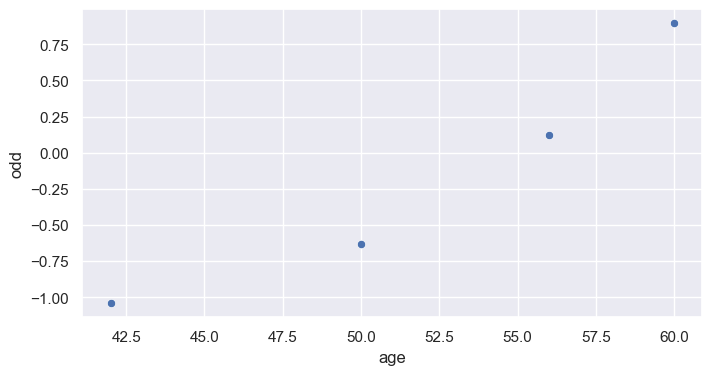

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(age_vs_odd, x='age', y='odd')
plt.show()

trestbps Vs log odd

In [35]:
trestbps_vs_presence = pd.DataFrame()
trestbps_vs_presence ['trestbps'] = train_inputs.trestbps.copy()
trestbps_vs_presence ['presence'] = train_target

In [36]:
qs = list(np.quantile(trestbps_vs_presence.trestbps, [0.25, 0.5, 0.75, 1]))
qs.insert(0,0)
qs

[0, 120.0, 130.0, 140.0, 200.0]

In [37]:
odds = []
trestbps_medians = []
for i in range(4):
    quan_lower = qs[i]
    quan_upper = qs[i+1]
    
    quan_data = trestbps_vs_presence[(trestbps_vs_presence.trestbps>quan_lower) & (trestbps_vs_presence.trestbps<=quan_upper)]
    presence_counts = quan_data.presence.value_counts()[1]
    
    quan_prob = presence_counts/len(quan_data)
    quan_odd = np.log(quan_prob/(1-quan_prob))
    odds.append(quan_odd)
    
    trestbps_medians.append(np.median(quan_data.trestbps))

In [38]:
trestbps_vs_odd = pd.DataFrame()
trestbps_vs_odd['trestbps'] =trestbps_medians
trestbps_vs_odd['odd'] = odds

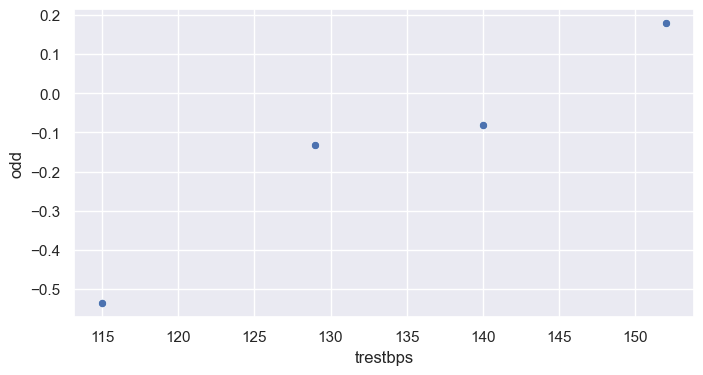

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(trestbps_vs_odd, x='trestbps', y='odd')
plt.show()

chol vs odd

In [40]:
chol_vs_presence = pd.DataFrame()
chol_vs_presence ['chol'] = train_inputs.chol.copy()
chol_vs_presence ['presence'] = train_target

In [41]:
qs = list(np.quantile(chol_vs_presence.chol, [0.25, 0.5, 0.75, 1]))
qs.insert(0,0)
qs

[0, 211.0, 243.0, 277.0, 564.0]

In [42]:
odds = []
chol_medians = []
for i in range(4):
    quan_lower = qs[i]
    quan_upper = qs[i+1]
    
    quan_data = chol_vs_presence[(chol_vs_presence.chol>quan_lower) & (chol_vs_presence.chol<=quan_upper)]
    presence_counts = quan_data.presence.value_counts()[1]
    
    quan_prob = presence_counts/len(quan_data)
    quan_odd = np.log(quan_prob/(1-quan_prob))
    odds.append(quan_odd)
    
    chol_medians.append(np.median(quan_data.chol))

In [43]:
chol_vs_odd = pd.DataFrame()
chol_vs_odd['chol'] = chol_medians
chol_vs_odd['odd'] = odds

In [44]:
odds

[-0.579818495252942,
 -0.25131442828090605,
 -0.2825669717850105,
 0.39803012962064616]

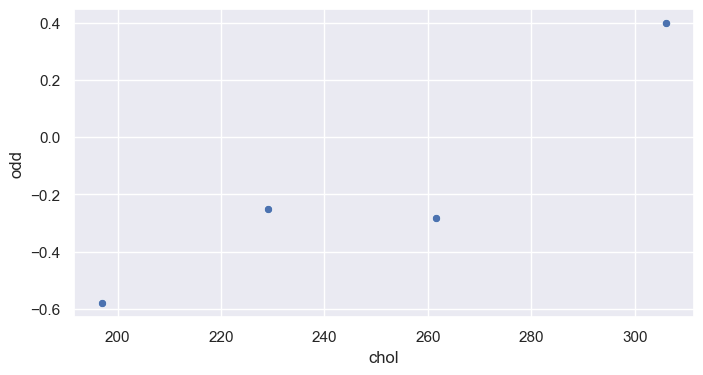

In [45]:
plt.figure(figsize=(8,4))
sns.scatterplot(chol_vs_odd, x='chol', y='odd')
plt.show()

thalach vs odd

In [46]:
thalach_vs_presence = pd.DataFrame()
thalach_vs_presence ['thalach'] = train_inputs.thalach.copy()
thalach_vs_presence ['presence'] = train_target

In [47]:
qs = list(np.quantile(thalach_vs_presence.thalach, [0.25, 0.5, 0.75, 1]))
qs.insert(0,0)
qs

[0, 132.0, 153.0, 165.0, 202.0]

In [48]:
odds = []
thalach_medians = []
for i in range(4):
    quan_lower = qs[i]
    quan_upper = qs[i+1]
    
    quan_data = thalach_vs_presence[(thalach_vs_presence.thalach>quan_lower) & (thalach_vs_presence.thalach<=quan_upper)]
    presence_counts = quan_data.presence.value_counts()[1]
    
    quan_prob = presence_counts/len(quan_data)
    quan_odd = np.log(quan_prob/(1-quan_prob))
    odds.append(quan_odd)
    
    thalach_medians.append(np.median(quan_data.thalach))

In [49]:
thalach_vs_odd = pd.DataFrame()
thalach_vs_odd['thalach'] = thalach_medians
thalach_vs_odd['odd'] = odds

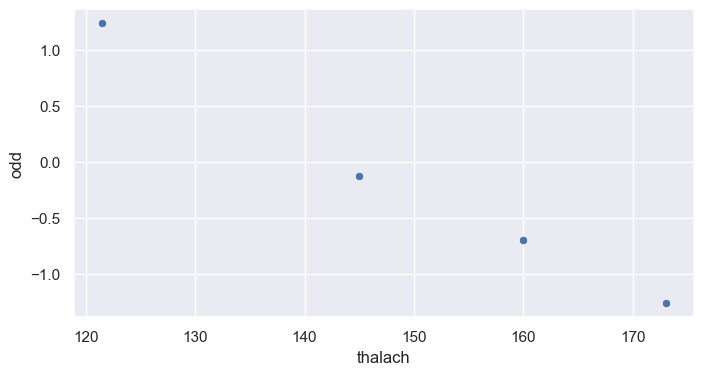

In [50]:
plt.figure(figsize=(8,4))
sns.scatterplot(thalach_vs_odd, x='thalach', y='odd')
plt.show()

oldpeak vs odd

In [51]:
oldpeak_vs_presence = pd.DataFrame()
oldpeak_vs_presence ['oldpeak'] = train_inputs.oldpeak.copy()
oldpeak_vs_presence ['presence'] = train_target

In [52]:
qs = list(np.quantile(oldpeak_vs_presence.oldpeak, [0.2, 0.4, 0.6, 0.8, 1]))
qs.insert(0,0)
qs

[0, 0.0, 0.4, 1.2, 1.9, 6.2]

In [53]:
odds = []
oldpeak_medians = []

for i in range(0,5):
    quan_lower = qs[i]
    quan_upper = qs[i+1]
    
    if (i==0):
        quan_data = oldpeak_vs_presence[(oldpeak_vs_presence.oldpeak==0)]
    else:
        quan_data = oldpeak_vs_presence[(oldpeak_vs_presence.oldpeak>quan_lower) & (oldpeak_vs_presence.oldpeak<=quan_upper)]
    presence_counts = quan_data.presence.value_counts()[1]
    
    quan_prob = presence_counts/len(quan_data)
    quan_odd = np.log(quan_prob/(1-quan_prob))
    odds.append(quan_odd)
    
    oldpeak_medians.append(np.median(quan_data.oldpeak))

In [54]:
oldpeak_vs_odd = pd.DataFrame()
oldpeak_vs_odd['oldpeak'] = oldpeak_medians
oldpeak_vs_odd['odd'] = odds

In [55]:
oldpeak_vs_odd

,oldpeak,odd
0,0.0,-1.009267
1,0.2,-1.280934
2,0.9,-0.163629
3,1.6,0.025975
4,2.8,1.665008


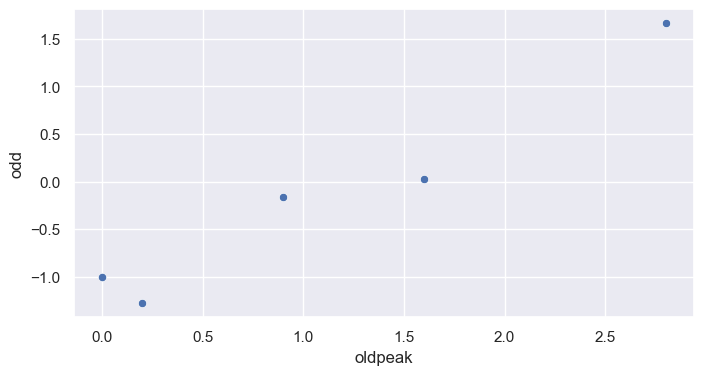

In [56]:
plt.figure(figsize=(8,4))
sns.scatterplot(oldpeak_vs_odd, x='oldpeak', y='odd')
plt.show()

##### Influential outliers 

<a href="https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/influential-points-regression">Explanation about influential outlier</a>

Cook's distance or Cook's D is a commonly used estimate of the influence of a data point when performing a least-squares regression analysis

In [57]:
from statsmodels.api import GLM, add_constant, families

In [58]:
x = train_inputs.copy()
x_with_const = add_constant(x)
y = train_target.copy()

model = GLM(y, x_with_const, family=families.Binomial())
result = model.fit()

In [59]:
# find cook distance of every sample (use it as an influential measurement)
cook_distances = result.get_influence().summary_frame()['cooks_d']
cook_thres = 4/len(x)

# find standardized residual for every sample
std_resids = np.abs(stats.zscore(result.resid_pearson))

# influential outliers
x[(cook_distances>cook_thres) & (std_resids>3)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
390,61,0,4,130,330,0,2,169,0,0.0,1,0,3
533,62,1,3,130,231,0,0,146,0,1.8,2,3,7
468,65,1,1,138,282,1,2,174,0,1.4,2,1,3
144,47,1,3,108,243,0,0,152,0,0.0,1,0,3
123,65,1,1,138,282,1,2,174,0,1.4,2,1,3
249,64,1,4,128,263,0,0,105,1,0.2,2,1,7
368,47,1,3,108,243,0,0,152,0,0.0,1,0,3
44,61,0,4,130,330,0,2,169,0,0.0,1,0,3
486,52,1,4,108,233,1,0,147,0,0.1,1,3,7


Remove influential outliers

In [60]:
train_inputs = train_inputs[~((cook_distances>cook_thres) & (std_resids>3))]

In [61]:
train_target= train_target[~((cook_distances>cook_thres) & (std_resids>3))]

In [62]:
train_inputs.shape, train_target.shape

((446, 13), (446,))

##### Absence of Multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
ind_vars = train_inputs.copy()

vif = pd.DataFrame()
values = []
for i, var in enumerate(ind_vars.columns):
    values.append(variance_inflation_factor(ind_vars, i))
    

In [65]:
vif['variables'] = ind_vars.columns

In [66]:
vif['vif'] = values

In [67]:
vif

,variables,vif
0,age,43.082186
1,sex,4.279798
2,cp,12.978586
3,trestbps,61.504327
4,chol,25.919349
5,fbs,1.241866
6,restecg,2.159259
7,thalach,33.296594
8,exang,2.072404
9,oldpeak,3.112382


There are a few variables where multicollinearity is violated. However, we do not really focus on interpreting the coef! more about prediction, and since it does not hurt the performance of the prediction, thus can neglect this step of handling multicollinearity.\
When interpreting "age", "cp", "trestbps", "chol", "thalach", "slope" their coefficients are questionable though

#### Create a logistic regresison model

In [68]:
from statsmodels.api import Logit

In [69]:
x = train_inputs.copy()
y = train_target.copy()

logit_model = Logit(y, add_constant(x))
logit_result = logit_model.fit()

logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.281695
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               presence   No. Observations:                  446
Model:                          Logit   Df Residuals:                      432
Method:                           MLE   Df Model:                           13
Date:                Sat, 26 Nov 2022   Pseudo R-squ.:                  0.5907
Time:                        11:39:13   Log-Likelihood:                -125.64
converged:                       True   LL-Null:                       -306.97
Covariance Type:            nonrobust   LLR p-value:                 1.673e-69
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1927      2.683     -3.053      0.002     -13.452      -2.933
age           -0.0329      0.022     -1.489      0.136      -0.076       0.010
sex            1.5614      0.476      3.280      0.001       0.628       2.494
cp             0.7573      0.172      4.405      0.000       0.420       1.094
trestbps       0.0316      0.010      3.217      0.001       0.012       0.051
chol           0.0055      0.003      1.655      0.098      -0.001       0.012
fbs           -1.4017      0.548     -2.559      0.011      -2.475      -0.328
restecg        0.1004      0.169      0.596      0.551      -0.230       0.431
thalach       -0.0289      0.010     -3.000      0.003      -0.048      -0.010
exang          0.9941      0.370      2.685      0.007       0.268       1.720
oldpeak        0.2211      0.179      1.237      0.216      -0.129       0.571
slope          0.9029      0.316      2.861      0.004       0.284       1.521
ca             1.7748      0.272      6.534      0.000       1.242       2.307
thal           0.4533      0.093      4.862      0.000       0.271       0.636
==============================================================================
"""

Try to interpret the coefficients:
* "age", "cp", "trestbps", "chol", "thalach", "slope"'s coefficients are questionable due to multicollinearity
* "sex"'s coef's is significant (p-value = 0.001): changing from "female" to "male" change the estimate of odd(=p/(1-p)) a factor of exp(1.5614)=4.77 (which means pnew>=pold)
* fbs coef's is significant (p-value = 0.011): changing from "fasting blood sugar<=120" to "fasting blood sugar>120" change the estimate of odd(=p/(1-p)) a factor of exp(-1.4017)= 0.246 (which means pnew<=pold)
* exang coef's is significant (p-value = 0.007): changing from "exercise induced no angina" to "exercise induced angina" change the estimate of odd a factor of np.exp(0.9941)=2.7 (which means pnew>=pold)
* ca coef's is significant (p-value = 0.000): an increase of one number of major vessels (0-3) colored by flourosopy change the estimate of odd a factor of np.exp(1.7748)=5.9 (which means pnew>=pold)
* thal coef's is significant (p-value = 0.000): the higher the defect, the higher change of getting heart disease

In [70]:
np.exp(0.4533)

1.5734961645632968

#### test

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
x_test = test_inputs
y_test = test_target

In [128]:
y_predict = (logit_result.predict(add_constant(x_test))> 0.5).astype('int32') # the decision threshold = 0.5

In [129]:
y_predict

174    1
171    0
349    1
430    1
146    0
      ..
302    1
34     0
503    1
399    0
0      0
Length: 114, dtype: int32

In [130]:
print('The accuracy score for a logistic regression model using the test dataset: ', accuracy_score(y_test, y_predict))

The accuracy score for a logistic regression model using the test dataset:  0.8859649122807017


In [131]:
pd.DataFrame(confusion_matrix(y_test, y_predict), index = ['Present', 'Absent'], columns=['Present', 'Absent'])

,Present,Absent
Present,54,8
Absent,5,47


### K Nearest Neighbors

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {'n_neighbors': range(50), 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=parameters, scoring='accuracy')
grid_search.fit(train_inputs, train_target)

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(0, 50),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [79]:
grid_search.best_params_

{'n_neighbors': 36, 'weights': 'distance'}

In [80]:
grid_search.best_score_

0.928214731585518

In [81]:
clf = grid_search.best_estimator_
clf

KNeighborsClassifier(n_neighbors=36, weights='distance')

#### test 

In [82]:
knn_result = clf.fit(train_inputs, train_target)

In [132]:
y_predict = knn_result.predict(test_inputs)

In [133]:
print('The accuracy score for a K Nearest Neighbors using the test dataset: ', accuracy_score(test_target, y_predict))

The accuracy score for a K Nearest Neighbors using the test dataset:  0.8508771929824561


In [134]:
pd.DataFrame(confusion_matrix(y_test, y_predict), index = ['Present', 'Absent'], columns=['Present', 'Absent'])

,Present,Absent
Present,58,4
Absent,13,39


### Decision tree and Random forest

#### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [87]:
clf = DecisionTreeClassifier(ccp_alpha=0.01)
result = clf.fit(train_inputs, train_target)

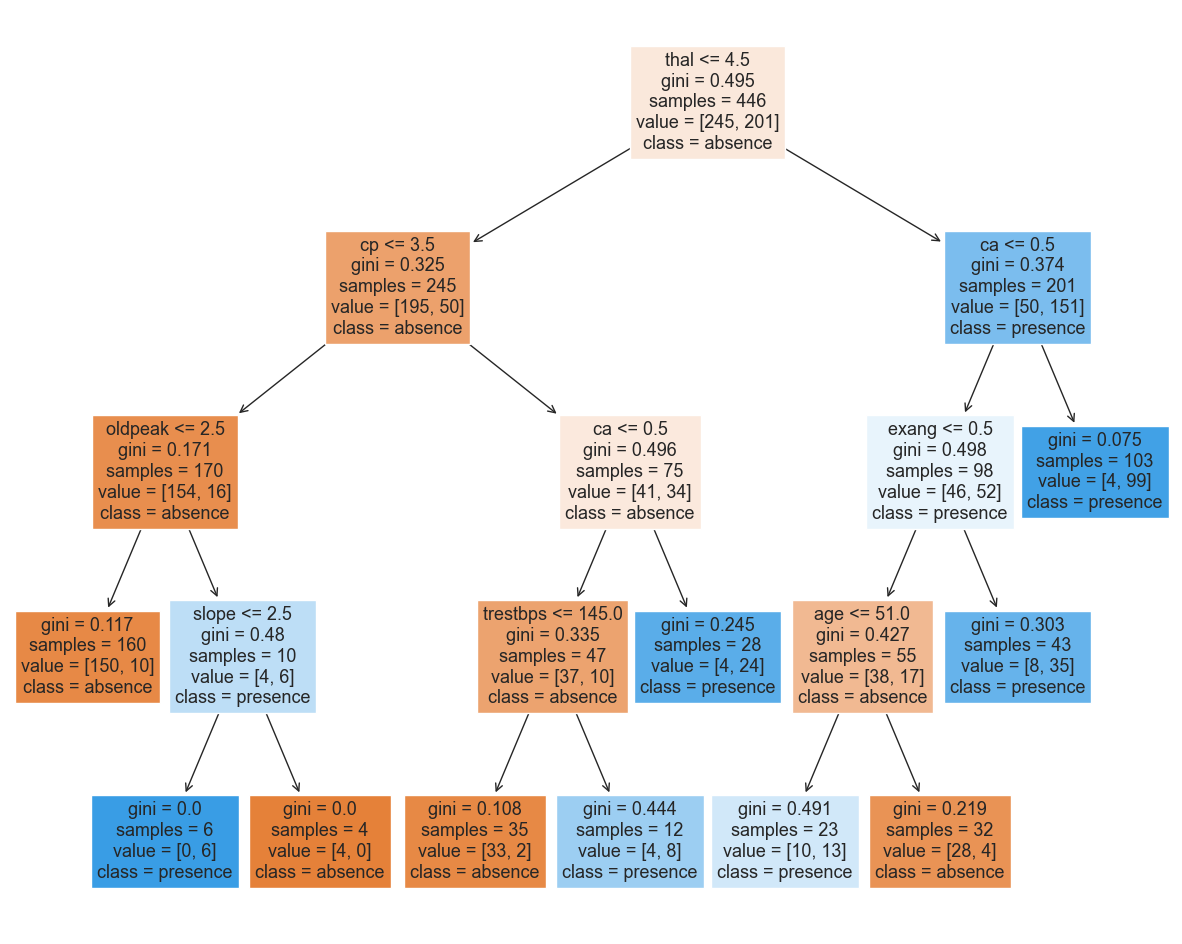

In [88]:
plt.figure(figsize=(15,12))
plot_tree(result, feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], class_names=['absence', 'presence'], filled=True)
plt.show()

In [89]:
params = {'ccp_alpha': np.linspace(0, 1, 1000)}
grid_search = GridSearchCV(DecisionTreeClassifier(), params, scoring='accuracy')
grid_search.fit(train_inputs, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0...
       0.96596597, 0.96696697, 0.96796797, 0.96896897, 0.96996997,
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ])},
             scoring='accuracy')

In [90]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.002002002002002002)

In [91]:
grid_search.best_score_

0.9259675405742822

#### Test Decision Tree

In [92]:
clf = grid_search.best_estimator_
decision_tree_result = clf.fit(train_inputs, train_target)

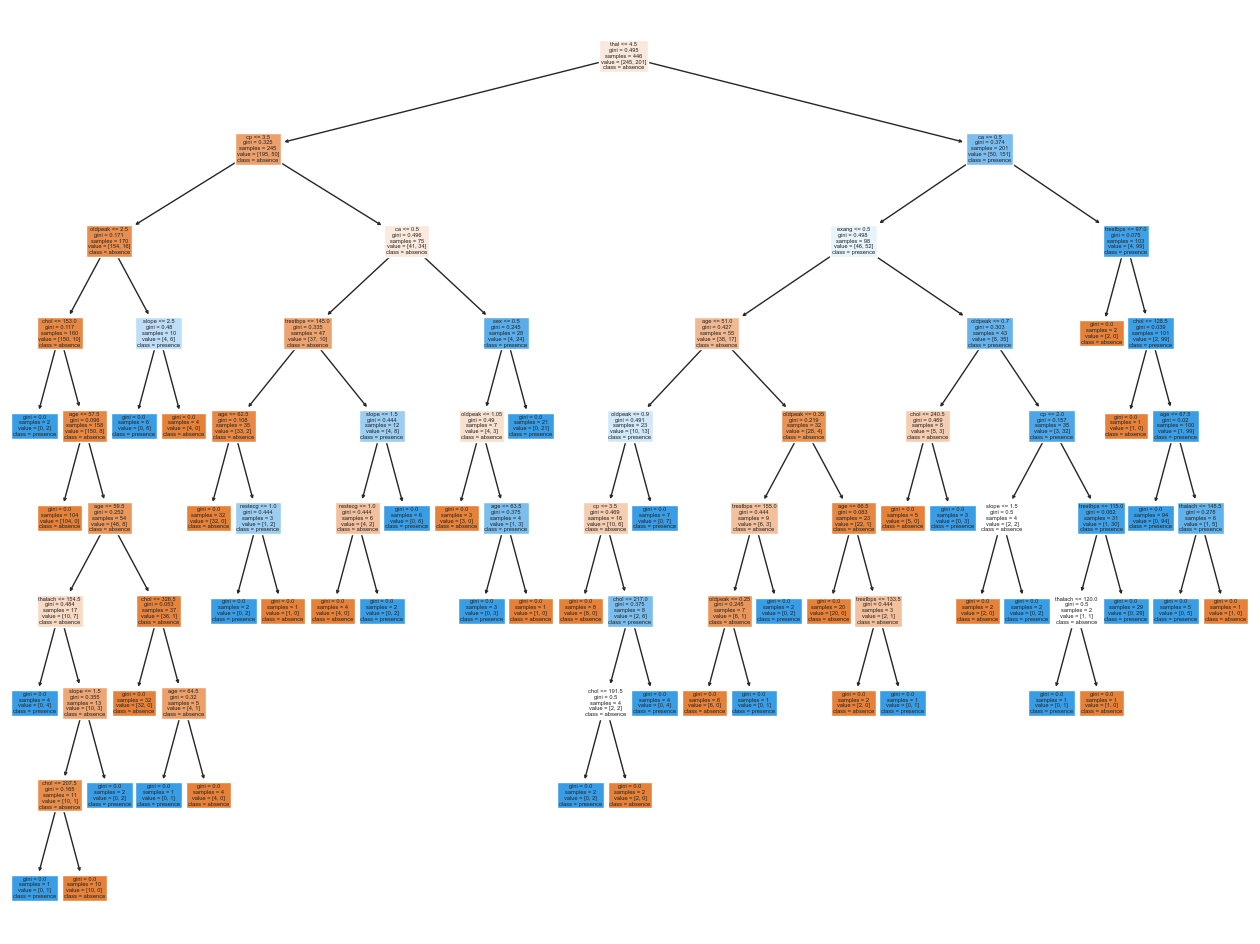

In [93]:
plt.figure(figsize=(16,12))
plot_tree(decision_tree_result, filled=True, feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], class_names=['absence', 'presence'])
plt.show()

In [94]:
y_predict = decision_tree_result.predict(test_inputs)

In [95]:
print('The accuracy score for a decision tree classifier using the test dataset: ', accuracy_score(test_target, y_predict))

The accuracy score for a decision tree classifier using the test dataset:  0.9210526315789473


In [96]:
confusion_matrix(y_test, y_predict)

array([[55,  7],
       [ 2, 50]], dtype=int64)

#### Random forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1), {'n_estimators': range(100), 'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [ 0.001]})
grid_search.fit(train_inputs, train_target)

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater than

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'ccp_alpha': [0.001],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(0, 100)})

In [99]:
grid_search.best_estimator_ # using 79 decision trees

RandomForestClassifier(ccp_alpha=0.001, max_features='log2', n_estimators=79,
                       n_jobs=-1)

In [100]:
grid_search.best_score_

0.9707865168539327

In [135]:
random_forest_clf = grid_search.best_estimator_

In [136]:
y_predict = random_forest_clf.predict(test_inputs)
print('The accuracy score for a random forest classifier using the test dataset: ', accuracy_score(test_target, y_predict))

The accuracy score for a random forest classifier using the test dataset:  0.9210526315789473


In [137]:
pd.DataFrame(confusion_matrix(y_test, y_predict), index = ['Present', 'Absent'], columns=['Present', 'Absent'])

,Present,Absent
Present,59,3
Absent,6,46


### Voting classifier (Ensemble classifier)

In [104]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [105]:
voting_clf = VotingClassifier(estimators= 
                              [('lr', LogisticRegression(max_iter=5000)), 
                               ('knn', KNeighborsClassifier(n_neighbors=36, weights='distance')), 
                               ('rf', RandomForestClassifier(ccp_alpha=0.001, n_estimators=63, n_jobs=-1))],
                             voting='soft')

In [106]:
voting_clf.estimators

[('lr', LogisticRegression(max_iter=5000)),
 ('knn', KNeighborsClassifier(n_neighbors=36, weights='distance')),
 ('rf', RandomForestClassifier(ccp_alpha=0.001, n_estimators=63, n_jobs=-1))]

In [138]:
voting_result = voting_clf.fit(train_inputs, train_target)

In [139]:
y_predict = voting_result.predict(x_test)

In [140]:
print('The accuracy score for a voting classifier using the test dataset: ', accuracy_score(y_test, y_predict))

The accuracy score for a voting classifier using the test dataset:  0.956140350877193


In [141]:
pd.DataFrame(confusion_matrix(y_test, y_predict), index = ['Present', 'Absent'], columns=['Present', 'Absent'])

,Present,Absent
Present,59,3
Absent,2,50


### ROC curve and the area under the ROC curve

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score

In [147]:
def my_auc_function(fpr, tpr):
    return np.sum((fpr[1:]-fpr[:-1])*tpr[1:])

#### Logistic Regression model

In [148]:
y_score = logit_result.predict(add_constant(test_inputs))

In [149]:
fpr, tpr, thresholds = roc_curve(test_target, y_score)

In [150]:
fpr[5], tpr[5], thresholds[5]

(0.016129032258064516, 0.25, 0.9906520674252853)

In [151]:
thresholds

array([1.99955427, 0.99955427, 0.99777303, 0.99625526, 0.99576952,
       0.99065207, 0.9894302 , 0.96609539, 0.95907937, 0.95761887,
       0.93689722, 0.93617078, 0.90807816, 0.89425859, 0.88487654,
       0.85545214, 0.78820305, 0.78152031, 0.75903121, 0.70678029,
       0.67089608, 0.65045801, 0.60994831, 0.5918026 , 0.58983431,
       0.58380088, 0.2667064 , 0.25083687, 0.20802639, 0.205838  ,
       0.1921079 , 0.18721793, 0.17948664, 0.17206337, 0.10243919,
       0.10005669, 0.09589712, 0.09545845, 0.07676219, 0.07563832,
       0.0521621 , 0.04593158, 0.03793431, 0.0303512 , 0.02406054,
       0.01012917, 0.00298432, 0.00221636])

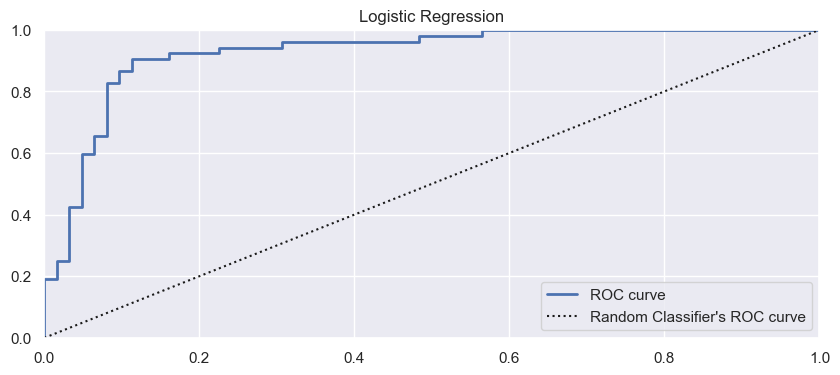

In [115]:
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, label="ROC curve", linewidth=2)
plt.plot([0,1], [0,1], 'k:', label="Random Classifier's ROC curve")
plt.title("Logistic Regression")
plt.legend()
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()

In [152]:
roc_auc_score(test_target, y_score)

0.9258684863523573

In [153]:
my_auc_function(fpr, tpr)

0.9258684863523573

#### K Nearest Neighbors

In [154]:
y_score = knn_result.predict_proba(test_inputs)[:, 1]
y_score

array([0.48804269, 0.        , 1.        , 1.        , 0.14390641,
       1.        , 1.        , 0.26078164, 0.        , 1.        ,
       0.33657781, 0.        , 0.        , 0.        , 0.44532829,
       1.        , 0.33842298, 0.        , 0.44519167, 0.26122364,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.31143363, 0.        , 0.52932854, 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.63828319, 0.1339091 , 1.        , 0.42030355,
       0.        , 0.        , 1.        , 0.33842298, 0.        ,
       1.        , 0.53917764, 0.        , 0.        , 1.        ,
       0.52932854, 1.        , 0.        , 1.        , 0.42030355,
       0.        , 0.        , 0.26122364, 0.        , 1.        ,
       1.        , 0.44532829, 1.        , 0.44519167, 0.6559469 ,
       1.        , 0.        , 0.63828319, 1.        , 0.        ,
       0.6559469 , 0.        , 0.        , 0.18527016, 0.     

In [155]:
fpr, tpr, thresholds = roc_curve(test_target, y_score)

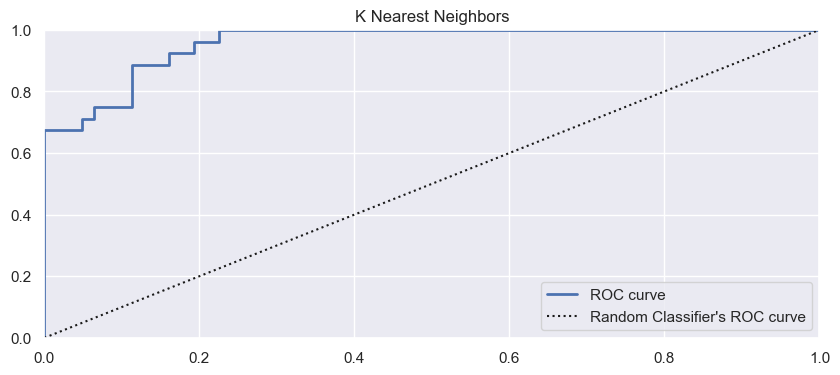

In [156]:
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, label="ROC curve", linewidth=2)
plt.plot([0,1], [0,1], 'k:', label="Random Classifier's ROC curve")
plt.title("K Nearest Neighbors")
plt.legend()
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()

In [157]:
thresholds

array([2.        , 1.        , 0.89356899, 0.6559469 , 0.63828319,
       0.53917764, 0.52932854, 0.48804269, 0.44532829, 0.42030355,
       0.35842532, 0.33842298, 0.33657781, 0.31468053, 0.31143363,
       0.30571374, 0.26122364, 0.26078164, 0.18527016, 0.1339091 ,
       0.        ])

In [158]:
my_auc_function(fpr, tpr)

0.9581265508684864

In [159]:
roc_auc_score(test_target, y_score)

0.9581265508684864

#### Random forest

In [160]:
y_score = random_forest_clf.predict_proba(test_inputs)[:, 1]

In [161]:
fpr, tpr, thresholds = roc_curve(test_target, y_score)

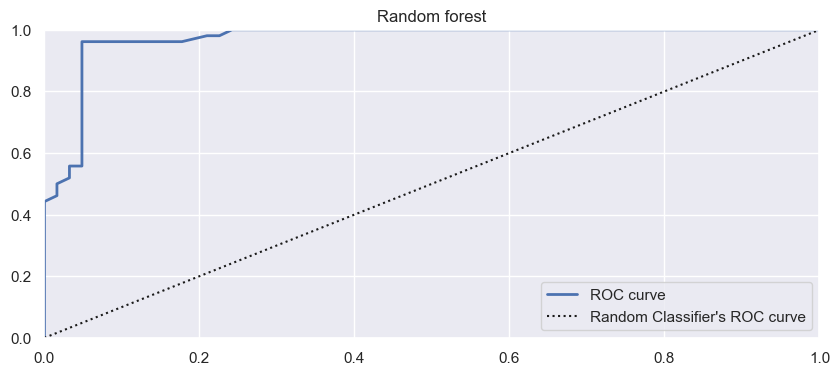

In [162]:
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, label="ROC curve", linewidth=2)
plt.plot([0,1], [0,1], 'k:', label="Random Classifier's ROC curve")
plt.title("Random forest")
plt.legend()
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()

In [163]:
my_auc_function(fpr, tpr)

0.9705334987593052

#### voting classifier

In [164]:
y_score = voting_clf.predict_proba(test_inputs)[:, 1]

In [165]:
fpr, tpr, thresholds = roc_curve(test_target, y_score)

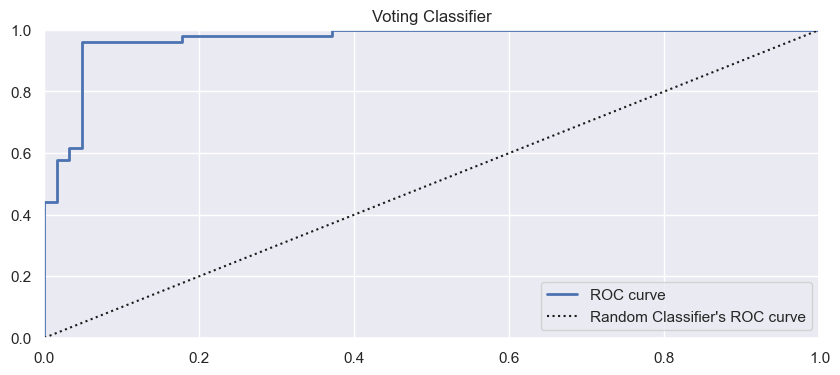

In [125]:
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, label="ROC curve", linewidth=2)
plt.plot([0,1], [0,1], 'k:', label="Random Classifier's ROC curve")
plt.title("Voting Classifier")
plt.legend()
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()

In [166]:
my_auc_function(fpr, tpr)

0.9680521091811415